In [5]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import sys
sys.path.append('../')
from utils import *

In [6]:
frames=read_video('../input-video/test-adios-input.mp4')
with open('../track-stub/test-stub-v5-2-3(.55conf).pkl','rb') as load:
    tracks=pickle.load(load)

In [8]:
cv2.imshow('frame1',frames[0])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
for track_id,vales in tracks['players'][0].items():
    bbox=vales['bbox']
    frame=frames[0]
    cropped_img=frame[int(bbox[1]):int(bbox[3]),int(bbox[0]):int(bbox[2])]
    cv2.imwrite(f"img/track_id-{track_id}.jpg",cropped_img)

In [2]:
def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

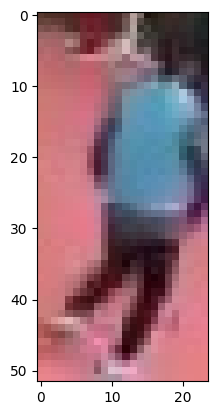

In [24]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='../model/pose_landmarker_heavy.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True,
    )
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file('img/track_id-3.jpg')

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
plt.imshow(annotated_image)